# 载入数据 以Dataset方式

In [1]:
#from PIL import Image
import os
import torch
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
import numpy as np
import os,glob
import random
from PIL import Image

In [1]:
train_path = 'data\\crnn_data\\train'
test_path = 'data\\crnn_data\\test'
valid_path = 'data\\crnn_data\\valid'

In [77]:
class SVHC_Dataset(Dataset):
    CHARS = '0123456789'
    char_to_seq = {char:i+1 for i,char in enumerate(CHARS)}
    seq_to_char = {label:char for char,label in char_to_seq.items()}
    
    
    
    def __init__(self,train_path,transform = None):
        self.transform = transform
        self.images_path = glob.glob(os.path.join(train_path,'*.png'))
        self.images_path.sort(key = lambda x:int(x.split('\\')[-1].split('_')[0]))
        self.channel = 1
        
    def __getitem__(self,index):
        img = Image.open(self.images_path[index]).convert('L')
        img = np.array(img)
        img = img.reshape((self.channel,32,32))# channel  height  width
        img = (img/127.0) - 1.0
        img = torch.FloatTensor(img)
        if self.transform is not None:
            img = self.transform(img)
        char = list(images_path[index].split('\\')[-1].split('_')[1])
        length = int(images_path[index].split('\\')[-1].split('_')[-1].split('.')[0])
        seq =[char_to_seq[i] for i in char]
        seq = torch.LongTensor(seq)
        return img,seq,torch.LongTensor([length])
    
    
    def __len__(self):
        return len(self.images_path)

In [78]:
def SVHC_collate_fn(batch):
    # zip(*batch)拆包
    images, targets, target_lengths = zip(*batch)
    # stack就是向量堆叠的意思。一定是扩张一个维度，然后在扩张的维度上，把多个张量纳入仅一个张量。想象向上摞面包片，摞的操作即是stack，0轴即按块stack
    images = torch.stack(images, 0)
    # cat是指向量拼接的意思。一定不扩张维度，想象把两个长条向量cat成一个更长的向量。
    targets = torch.cat(targets, 0) #将多个batch并到一个上面
    target_lengths = torch.cat(target_lengths, 0)
    # 此处返回的数据即使train_loader每次取到的数据，迭代train_loader，每次都会取到三个值，即此处返回值。
    return images, targets, target_lengths

In [79]:
from config import train_config as config
img_width = config['img_width']
img_height = config['img_height']
train_batch_size = config['train_batch_size']
cpu_workers = config['cpu_workers']

In [80]:
train_dataset = SVHC_Dataset(train_path)
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=train_batch_size,
    shuffle=True,
    num_workers=cpu_workers,
    collate_fn=SVHC_collate_fn)

In [81]:
train_data = train_dataset.__getitem__(0)

In [82]:
print(f'train_data的类型是：{type(train_data)}')
print(f'train_data的长度是：{len(train_data)}')

train_data的类型是：<class 'tuple'>
train_data的长度是：3


In [83]:
train_data

(tensor([[[-0.5197, -0.4252, -0.4331,  ..., -0.4252, -0.4331, -0.4567],
          [-0.4961, -0.4646, -0.3937,  ..., -0.3780, -0.4094, -0.4567],
          [-0.5433, -0.4488, -0.4173,  ..., -0.3701, -0.3937, -0.4016],
          ...,
          [-0.3937, -0.2441, -0.1811,  ..., -0.1811, -0.1969, -0.1811],
          [-0.3543, -0.1890, -0.1732,  ..., -0.1732, -0.1890, -0.2047],
          [-0.3701, -0.1654, -0.1417,  ..., -0.2047, -0.1969, -0.2126]]]),
 tensor([ 2, 10]),
 tensor([2]))

In [84]:
img = train_data[0]
label_idx = train_data[1]
label_length = train_data[2]
print(f'img的类型是：{type(img)}')
print(f'img的shape是：{img.shape}')
print('img matrix如下:')
print(img)

img的类型是：<class 'torch.Tensor'>
img的shape是：torch.Size([1, 32, 32])
img matrix如下:
tensor([[[-0.5197, -0.4252, -0.4331,  ..., -0.4252, -0.4331, -0.4567],
         [-0.4961, -0.4646, -0.3937,  ..., -0.3780, -0.4094, -0.4567],
         [-0.5433, -0.4488, -0.4173,  ..., -0.3701, -0.3937, -0.4016],
         ...,
         [-0.3937, -0.2441, -0.1811,  ..., -0.1811, -0.1969, -0.1811],
         [-0.3543, -0.1890, -0.1732,  ..., -0.1732, -0.1890, -0.2047],
         [-0.3701, -0.1654, -0.1417,  ..., -0.2047, -0.1969, -0.2126]]])


In [85]:
import matplotlib.pyplot as plt

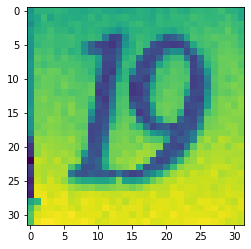

In [86]:
img = np.transpose(img, (1, 2, 0))
img = np.squeeze(img)
plt.imshow(img)
plt.show()

In [89]:
chars = '0123456789'
label = ''
for idx in label_idx:
    label += chars[idx-1]
print(f'label为：{label}')

label为：19
